In [1]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import fipy as fp

from fvm_utils import *

# Accessing meshed Census data

Decennial census data that has been saved as a fipy CellVariable can be found at:

`/project/vitelli/dsseara/schelling/data/decennial/meshed`

In [2]:
census_dir = "/project/vitelli/dsseara/schelling/data/decennial"
census_meshed_folders = sorted(glob(os.path.join(census_dir, "meshed", "*")))

# take a look at Cook County
census_county_folder = [folder for folder in census_meshed_folders if "Illinois_Cook" in folder][0]

Inside of each folder are a number of `.fipy` files.

The files `STATE_COUNTY_YEAR.fipy` contain the information:
```python
    white
    white_county
    black
    black_county
    hispanic
    hispanic_county
    aapi
    aapi_county
    total
    total_county
    mesh
    mesh_county
    year
```
- `demo_county` is a `fipy` `CellVariable` with that demographic's population numbers in a specific county
- `demo` contains information for the county and the region surrounding that county.
- `mesh` and `mesh_county` are the `Gmsh()` objects that each demo uses
- `year` is the year from which the data is taken.

The file `STATE_COUNTY_capacity.fipy` contains the information:
```python
    capacity
    capacity_county
```
- `capacity` contains the estimate of the carrying capacity of the region
- `capacity_county` contains the estimate of the carrying capacity for the county

Note that some capacities = 0, so when calculating the fill fraction, e.g. `ϕW = white / capacity`, need to set zero values of capacity to `np.inf` to get `ϕW=0` there.


In [3]:
census_fipy_files = sorted(glob(os.path.join(census_county_folder, "*")))

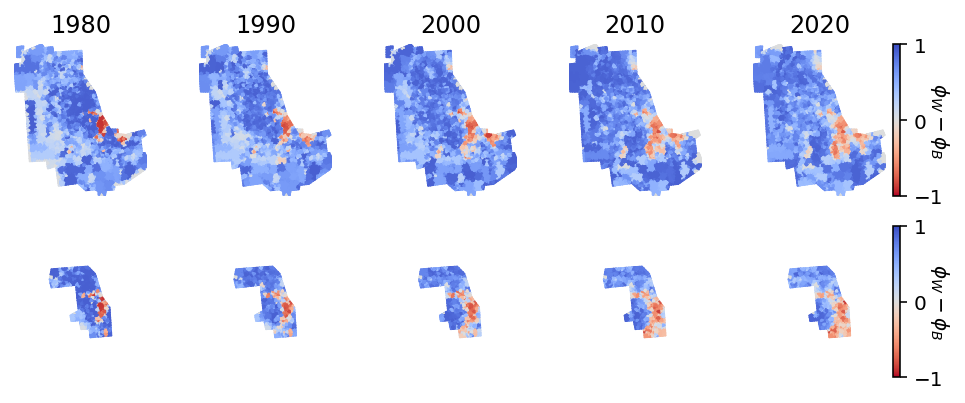

In [4]:
fig, ax = plt.subplots(2, len(census_fipy_files)-1, dpi=144, figsize=(8, 3),
                       sharey=True, sharex=True)

census_capacity, census_capacity_county = fp.tools.dump.read(census_fipy_files[-1])
# if capacity = 0, just make sure phiW = 0 there
census_capacity.value[np.where(census_capacity.value==0.0)] = np.inf
census_capacity_county.value[np.where(census_capacity_county.value==0.0)] = np.inf

for fidx, fipy_file in enumerate(census_fipy_files[:-1]):
    data = fp.tools.dump.read(fipy_file)
    [white, white_county,
     black, black_county,
     hispanic, hispanic_county,
     aapi, aapi_county,
     total, total_county,
     mesh, mesh_county, year] = data
    
    ϕW = white / census_capacity
    ϕB = black / census_capacity

    ϕW_county = white_county / census_capacity_county
    ϕB_county = black_county / census_capacity_county
    
    plot_mesh(ϕW - ϕB, mesh, ax=ax[0, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(census_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")
    
    plot_mesh(ϕW_county - ϕB_county, mesh_county, ax=ax[1, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(census_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")

    ax[0, fidx].set(title=year)

for a in fig.axes:
    xmin, ymin = mesh.extents["min"]
    xmax, ymax = mesh.extents["max"]
    a.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    a.axis('off')
    
    

There is also a function called `fvm_utils.gaussian_blur_mesh(var, sigma=sig)` that will smooth the data with a Gaussian of width `sig`

smoothing...
done
smoothing...
done
smoothing...
done
smoothing...
done
smoothing...
done


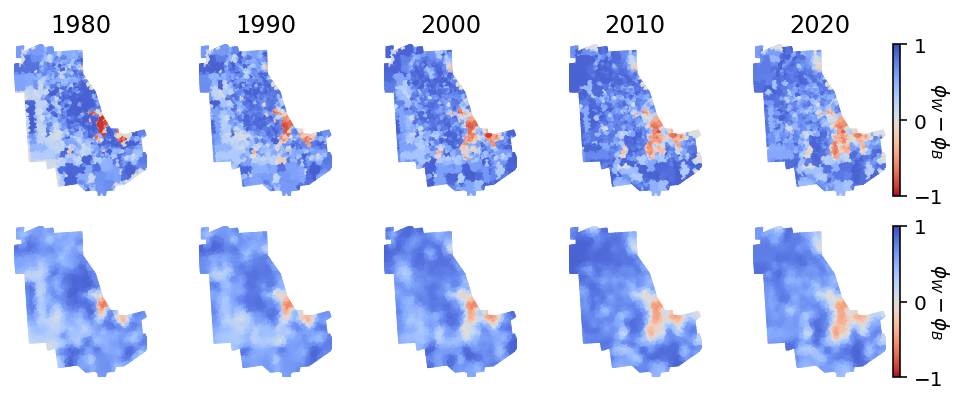

In [7]:
sig = 10

fig, ax = plt.subplots(2, len(census_fipy_files)-1, dpi=144, figsize=(8, 3),
                       sharey=True, sharex=True)

census_capacity = fp.tools.dump.read(census_fipy_files[-1])[0]
# if capacity = 0, just make sure phiW = 0 there
census_capacity.value[np.where(census_capacity.value==0.0)] = np.inf


x, y = census_capacity.mesh.cellCenters
coords = np.stack([x, y], axis=-1)
dist_mat = spatial.distance_matrix(coords, coords)

for fidx, fipy_file in enumerate(census_fipy_files[:-1]):
    data = fp.tools.dump.read(fipy_file)
    [white, white_county,
     black, black_county,
     hispanic, hispanic_county,
     aapi, aapi_county,
     total, total_county,
     mesh, mesh_county, year] = data
    
    ϕW = white / census_capacity
    ϕB = black / census_capacity

    print("smoothing...")
    ϕW_smooth = gaussian_blur_mesh(ϕW, sigma=sig, dist=None)
    ϕB_smooth = gaussian_blur_mesh(ϕB, sigma=sig, dist=None)
    print("done")
    
    plot_mesh(ϕW - ϕB, mesh, ax=ax[0, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(census_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")
    
    plot_mesh(ϕW_smooth - ϕB_smooth, mesh, ax=ax[1, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(census_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")

    ax[0, fidx].set(title=year)

for a in fig.axes:
    xmin, ymin = mesh.extents["min"]
    xmax, ymax = mesh.extents["max"]
    a.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    a.axis('off')
    
    

# Accessing meshed ACS data

Similarly, yearly ACS data can be accessed at:

`/project/vitelli/dsseara/schelling/data/yearly/raw/meshed`

In [ ]:
acs_folder = "/project/vitelli/dsseara/schelling/data/yearly/raw/"
acs_meshed_folders = sorted(glob(os.path.join(acs_folder, "meshed", "*")))

# take a look at Cook County
acs_county_folder = [folder for folder in acs_meshed_folders if "Illinois_Cook" in folder][0]

In [ ]:
acs_fipy_files = sorted(glob(os.path.join(acs_county_folder, "*")))

In [ ]:
fig, ax = plt.subplots(2, len(acs_fipy_files)-1, dpi=144, figsize=(12, 3),
                       sharey=True, sharex=True)

acs_capacity, acs_capacity_county = fp.tools.dump.read(acs_fipy_files[-1])
# if capacity = 0, just make sure phiW = 0 there
acs_capacity.value[np.where(acs_capacity.value==0.0)] = np.inf
acs_capacity_county.value[np.where(acs_capacity_county.value==0.0)] = np.inf

for fidx, fipy_file in enumerate(acs_fipy_files[:-1]):
    data = fp.tools.dump.read(fipy_file)
    [white, white_county,
     black, black_county,
     hispanic, hispanic_county,
     aapi, aapi_county,
     total, total_county,
     mesh, mesh_county, year] = data

    ϕW = white / acs_capacity
    ϕW.value[np.isnan(ϕW.value)] = 0.0
    ϕB = black / acs_capacity
    ϕB.value[np.isnan(ϕB.value)] = 0.0

    ϕW_county = white_county / acs_capacity_county
    ϕW_county.value[np.isnan(ϕW_county.value)] = 0.0
    ϕB_county = black_county / acs_capacity_county
    ϕB_county.value[np.isnan(ϕB_county.value)] = 0.0

    plot_mesh(ϕW - ϕB, mesh, ax=ax[0, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(acs_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")
    
    plot_mesh(ϕW_county - ϕB_county, mesh_county, ax=ax[1, fidx],
              vmin=-1, vmax=1, cmap=plt.cm.coolwarm_r,
              colorbar=(fidx==len(acs_fipy_files)-2),
              colorbar_title=r"$\phi_W - \phi_B$")
    ax[0, fidx].set(title=year)
    

for a in fig.axes:
    xmin, ymin = mesh.extents["min"]
    xmax, ymax = mesh.extents["max"]
    a.set(xlim=[xmin, xmax], ylim=[ymin, ymax])
    a.axis('off')